# (a) plot of the generated data in 3-dim

linear function = $f(x, y) = 2x + 3y + 1$

gen 100 data examples {(x, y, z)}
+ $x \in [-1, 1]$
+ $y \in [-1, 1]$
+ gausian noise - $\epsilon \sim N(0, I)$
+ $z = 2x + 3y + 1 + \epsilon$

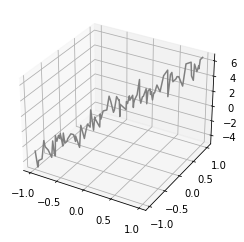

In [69]:
import random

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# sorting을 하는게 맞는가? - 선형이 더 잘드러나서 하긴했음
xs = np.sort(2*np.random.random_sample(100) - 1)
ys = np.sort(2*np.random.random_sample(100) - 1)

# random sampling fron N(0,1)
es = np.random.normal(0, 1, 100)

zs = []
for x, y, e in zip(xs, ys, es):
    zs.append(2*x + 3*y + 1 + e)
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, 'gray')
plt.show()

# (b) Provie optimal solution $\theta$ and draw the obtained hyperplane 3d dim space with generated training data

linear model - $\theta \in R^3, f_\theta(x, y) = \theta_0x + \theta_1y + \theta_3$

Solve a least square problem by normal equation.
$\theta = (X^TX)^{-1}X^Ty$

$X =
 \begin{pmatrix}
 x_{11} & y_{12} & 1 \\
 x_{21} & y_{22} & 1
 \end{pmatrix}$
 
$\theta =
 \begin{pmatrix}
 \theta_{0} \\
 \theta_{1} \\
 \theta_{2} \\
 \end{pmatrix}$

theta_0 = 2.6619030637736243 theta_1 = 2.334636145032721 theta_2 = 0.9831832882872541


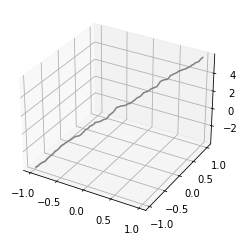

In [70]:
from pprint import pprint
X = np.transpose([xs, ys, np.ones(100)])
y = np.transpose(zs)

# normal equation
theta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)
print(f'theta_0 = {theta[0]} theta_1 = {theta[1]} theta_2 = {theta[2]}')

zs_normal_equation = theta[0] * xs + theta[1] * ys + theta[2]
zs_normal_equation

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs_normal_equation, 'gray')
plt.show()

# (c) Provide a training curve plot($x$-axis: the number of iterations, $y$-axis: loss values) and the optimal solution.

linear model - $\theta \in R^3, f_\theta(x, y) = \theta_0x + \theta_1y + \theta_2$

Solve a least square problem by using a gradient descent algorithm<br>
$\theta_{i+1} = \theta_i - \alpha{df \over d\theta}(\theta_i)$, $\alpha$ = learning_rate

Try 5 different lr and draw all training curves in a plot.

Compare to the solution with the solution by normal equation.
-> (이건 알아서 적도록 원하는 결과는 비슷한거 같긴함)


Linear model through normal equation
f(x,y) = 2.6619030637736243x + 2.334636145032721y + 0.27232747315539185
lr = 0.5


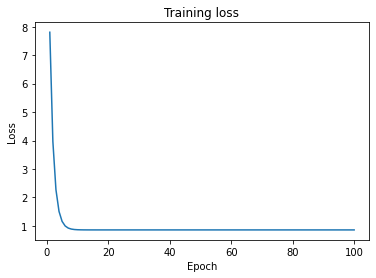

f(x,y) = 2.374267999351775x + 2.634400170734874y + 0.9506310258175759
--------------------------------------------------------------------------------
lr = 0.2


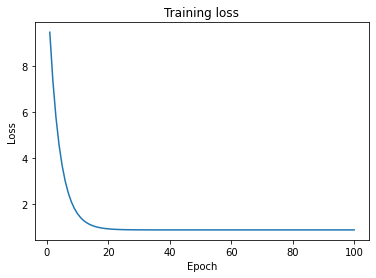

f(x,y) = 2.635279545366391x + 2.362376043822585y + 0.9801705992811874
--------------------------------------------------------------------------------
lr = 0.1


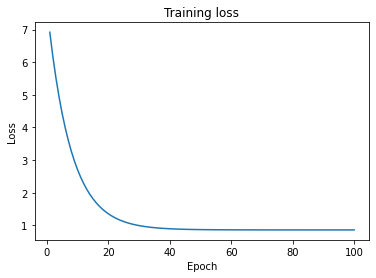

f(x,y) = 2.1094387337791343x + 2.9042066086497487y + 0.9210055961649095
--------------------------------------------------------------------------------
lr = 0.05


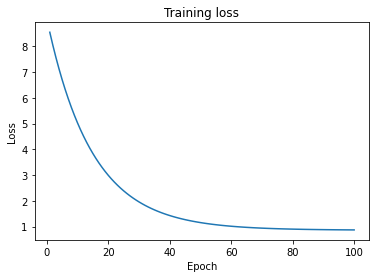

f(x,y) = 2.014360612939657x + 2.8218277331205988y + 0.9154233674352711
--------------------------------------------------------------------------------
lr = 0.01


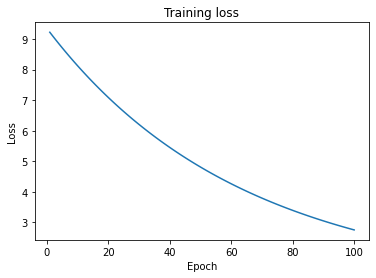

f(x,y) = 1.046296406703012x + 1.8450155666597903y + 0.27232747315539185
--------------------------------------------------------------------------------


In [68]:
np.random.seed(0)
def gradient_descent(xs, ys, zs, lr):
    # weight
    w1 = np.random.uniform(low=-1.0, high=1.0)
    w2 = np.random.uniform(low=-1.0, high=1.0)
    # bias
    b = np.random.uniform(low=-1.0, high=1.0)
    
    curve_x = []
    curve_y = []

    for epoch in range(100):
        new_zs = w1 * xs + w2 * ys + b
        loss = ((new_zs - zs)**2).mean()

        w1 = w1 - lr * ((new_zs - zs)*xs).mean()
        w2 = w2 - lr * ((new_zs - zs)*ys).mean()
        b = b - lr * (new_zs - zs).mean()

        curve_x.append(epoch+1)
        curve_y.append(loss)
    
    plt.figure()
    plt.plot(curve_x, curve_y)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training loss')
    plt.show()
    return w1, w2, b

print('Linear model through normal equation')
print(f'f(x,y) = {theta[0]}x + {theta[1]}y + {b}')


print('lr = 0.5')
w1, w2, b = gradient_descent(xs, ys, zs, 0.5)
print(f'f(x,y) = {w1}x + {w2}y + {b}')
print('-'*80)
    
print('lr = 0.2')
w1, w2, b = gradient_descent(xs, ys, zs, 0.2)
print(f'f(x,y) = {w1}x + {w2}y + {b}')
print('-'*80)

print('lr = 0.1')
w1, w2, b = gradient_descent(xs, ys, zs, 0.1)
print(f'f(x,y) = {w1}x + {w2}y + {b}')
print('-'*80)

print('lr = 0.05')
w1, w2, b = gradient_descent(xs, ys, zs, 0.05)
print(f'f(x,y) = {w1}x + {w2}y + {b}')
print('-'*80)

print('lr = 0.01')
w1, w2, b = gradient_descent(xs, ys, zs, 0.01)
print(f'f(x,y) = {w1}x + {w2}y + {b}')
print('-'*80)